### **SOW-MKI49-2019-SEM1-V: NeurIPS**

# Project: Skeleton Code

In [1]:
class NeurosmashAgent:
    def __init__(self):
        pass

    def step(self, info, reward, state):
        #return 0 # no action
        #return 1 # left action
        #return 2 # right action
        #return 3 # built-in random action
        return 4 # built-in ai action

In [2]:
import random
import socket
import struct

class NeurosmashEnvironment:
    def __init__(self, ip = "127.0.0.1", port = 13000):
        self.client = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
        self.ip     = ip
        self.port   = port

        self.client.connect((ip, port))

    def init(self):
        self._send(0, 1)
        return self._receive()

    def step(self, action):
        self._send(action, 2)
        return self._receive()

    def _receive(self):
        data   = self.client.recv(1 + 1 + 256 * 256 * 3)
        info   = data[0]
        reward = data[1]
        state  = [data[i] for i in range(2, len(data))]
        return info, reward, state

    def _send(self, action, transition):
        self.client.send(bytes([action, transition]))

In [3]:
agent       = NeurosmashAgent()
environment = NeurosmashEnvironment()

In [4]:
info, reward, state = environment.init()

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL.ImageOps import equalize, autocontrast
from PIL import Image

In [6]:
state_list = []

In [7]:
action = agent.step(info, reward, state)
for i in range(1000):
    info, reward, state = environment.step(action)
    if len(state) == 3*256*256:
        state_list.append(state)

In [8]:
len(state_list)

10

In [2]:
import pickle

In [127]:
#pickle.dump({'state_list':state_list, 'img_list':img_list}, open( "NIPS_imgs.pickle", "wb" ) )

In [3]:
dict_vars = pickle.load(open('NIPS_imgs.pickle', 'rb'))
dict_vars.keys()
state_list = dict_vars['state_list']
img_list = dict_vars['img_list']

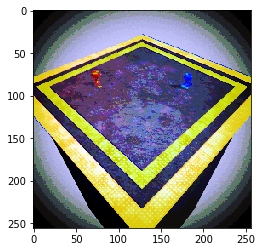

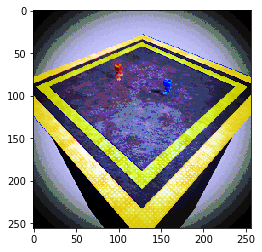

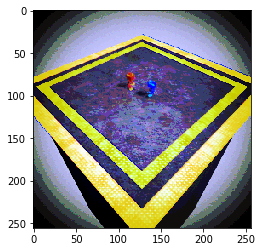

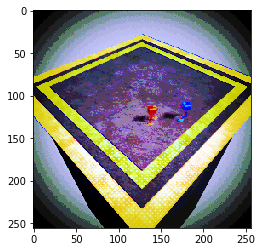

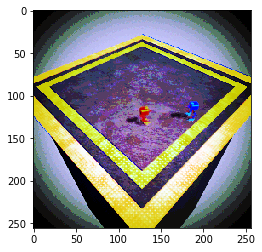

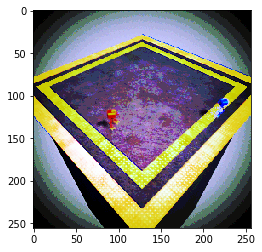

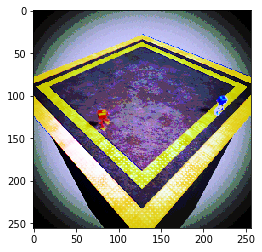

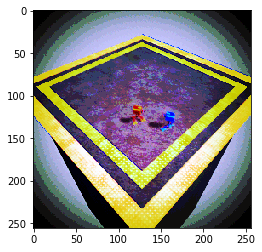

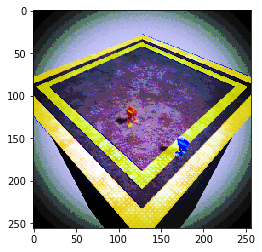

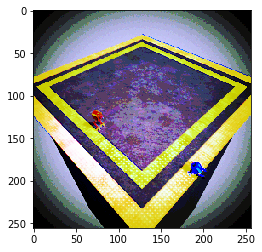

In [4]:
img_list = []
for sl in state_list:
    img = np.array(sl).reshape(3,256,256).transpose(1,2,0)[::-1]

    b, g, r = cv2.split(img)

    r = Image.fromarray(np.uint8(r))
    r = equalize(r)
    #r = autocontrast(r)
    r = np.array(r)

    g = Image.fromarray(np.uint8(g))
    g = equalize(g)
    #g = autocontrast(g)
    g = np.array(g)

    b = Image.fromarray(np.uint8(b))
    b = equalize(b)
    #b = autocontrast(b)
    b = np.array(b)

    img = cv2.merge((b,g,r))

    plt.imshow(img)
    img_list.append(img)
    plt.show()

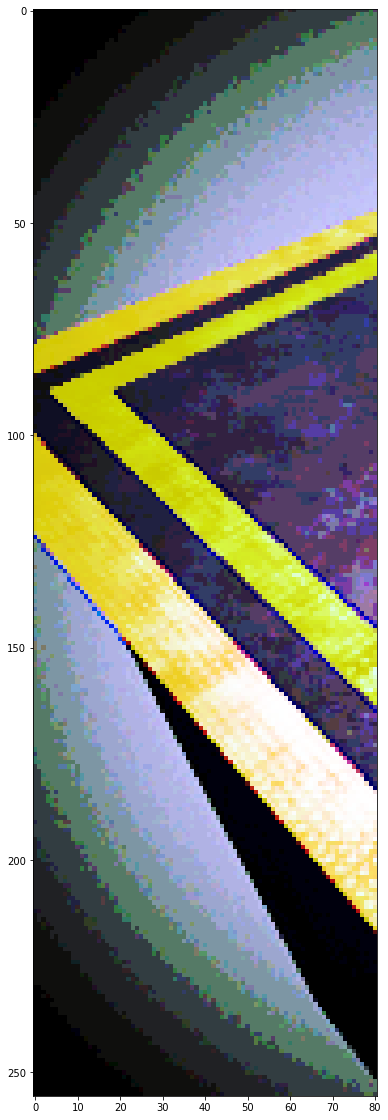

In [5]:
plt.figure(figsize=(20,20))
plt.imshow(img_list[-2][:,:81,:])

In [6]:
plt.figure(figsize=(20,20))
base = np.hstack((img_list[-2][:,:81,:],img_list[0][:,81:160,:],img_list[2][:,160:,:]))
#cv2.imwrite('ring.png', base)

<Figure size 1440x1440 with 0 Axes>

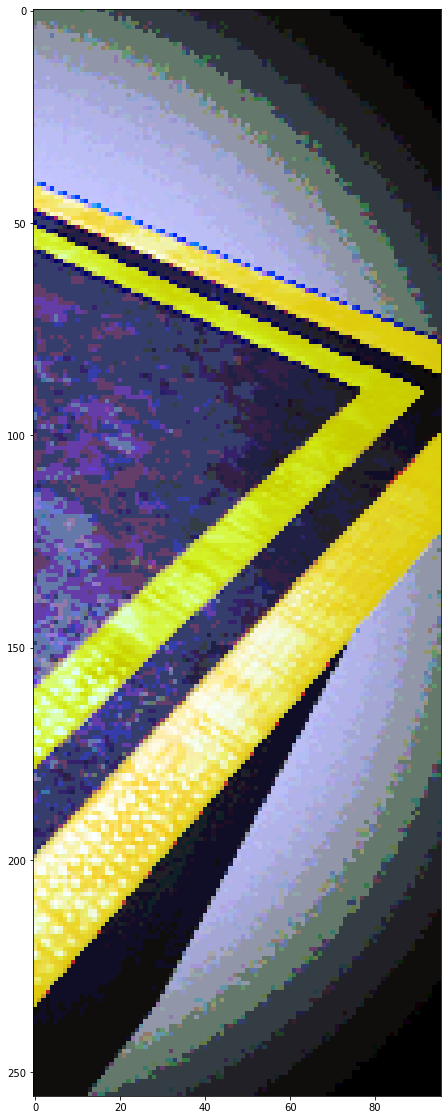

In [7]:
plt.figure(figsize=(20,20))
plt.imshow(img_list[2][:,160:,:])

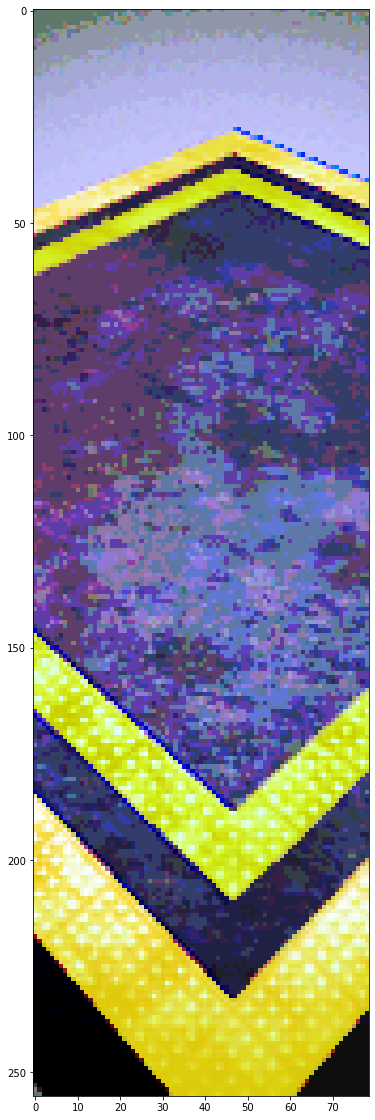

In [8]:
plt.figure(figsize=(20,20))
plt.imshow(img_list[0][:,81:160,:])

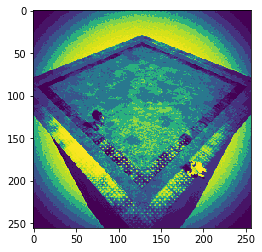

In [9]:
plt.imshow(r)

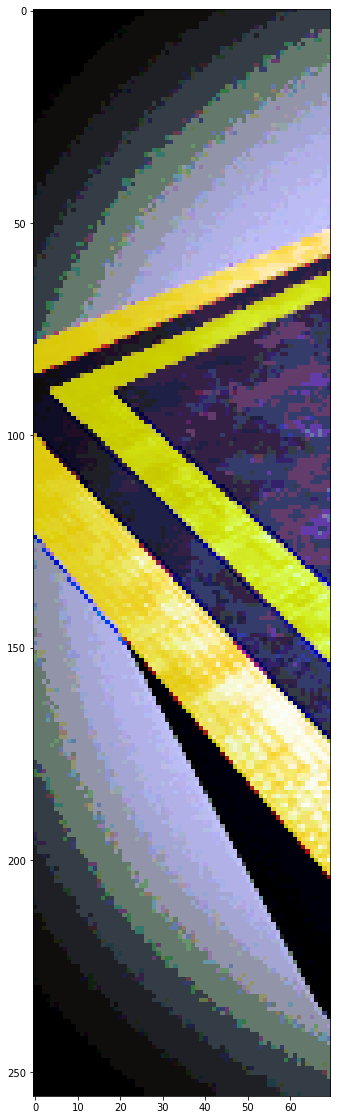

In [10]:
plt.figure(figsize = (20,20))
plt.imshow(img_list[1][:,0:70,:])

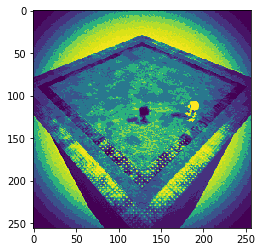

In [11]:
plt.imshow(img_list[4][:,:,2])

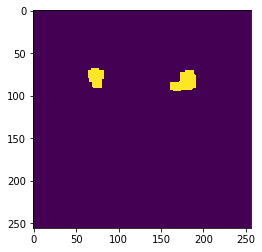

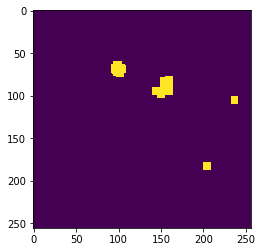

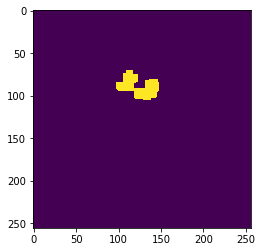

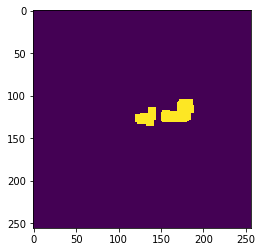

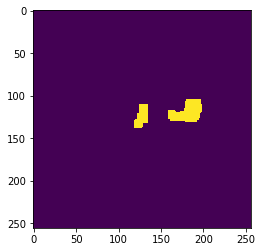

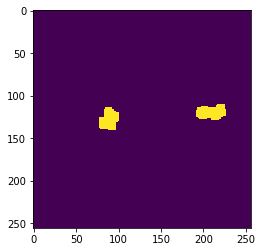

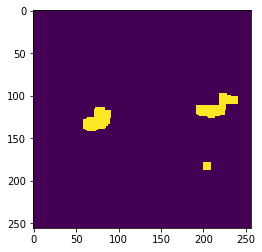

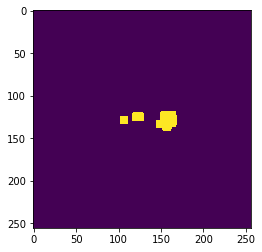

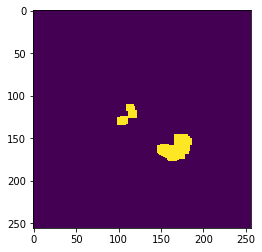

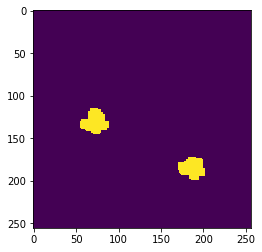

In [43]:
for i in img_list:
    #plt.imshow(cv2.cvtColor(i,cv2.COLOR_BGR2GRAY)-cv2.cvtColor(base,cv2.COLOR_BGR2GRAY))
    #plt.show()
    #minus = np.abs(cv2.bilateralFilter(i[:,:,1],7, 75, 75)-cv2.bilateralFilter(base[:,:,1],7,75,75))
    minus = np.abs(i[:,:,1]-base[:,:,1])
    #minus = np.abs(i[:,:,0]-base[:,:,0])
    #minus = np.abs(i[:,:,2]-base[:,:,2])
    #plt.imshow(minus)
    
    #print(np.where((minus >= 170) & (minus <= 220)))
    
    canvas = np.zeros((256,256))
    
    canvas[np.where((minus >= 200) & (minus <= 220))] = 255
    
    
    kernel = np.ones((5,5), np.uint8)
    
    canvas = cv2.dilate(canvas, kernel, iterations = 3)
    canvas = cv2.erode(canvas, kernel, iterations = 1)
    
    canvas = cv2.threshold(canvas, 126, 255, cv2.THRESH_BINARY) 
    
    
    a, b, c = cv2.findContours(np.uint8(canvas[1]), cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
    
    
    cv2.drawContours(np.zeros((256,256)), b, -1, (0,124,0), 1)
    
    plt.imshow(a)
    plt.show()
    

In [32]:
data = cv2.cvtColor(img_list[4],cv2.COLOR_BGR2GRAY)-cv2.cvtColor(base,cv2.COLOR_BGR2GRAY)

#plt.imshow(img_list[4][:,:,0]-img_list[6][:,:,0])
#plt.show()
#plt.imshow(img_list[4][:,:,1]-img_list[6][:,:,1])


#kernel = np.ones((2,2),np.uint8)
#img2 = cv2.dilate(cv2.erode(img_list[1][:,:,1]-base, kernel),  kernel)
#plt.imshow(cv2.morphologyEx(img2, cv2.MORPH_OPEN, kernel))
#plt.show()

#plt.imshow(img_list[4][:,:,2]-img_list[6][:,:,2])
#plt.show()

ValueError: operands could not be broadcast together with shapes (256,256) (256,256,3) 

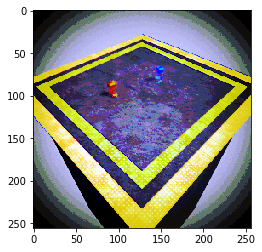

In [58]:
plt.imshow(img_list[4])

In [59]:
b, g, r = cv2.split(img_list[4])

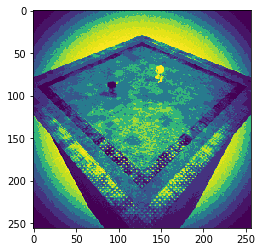

In [60]:
plt.imshow(r)

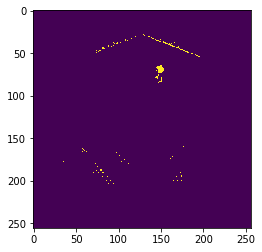

In [61]:
plt.imshow(np.where(r >= 254, 1, 0))

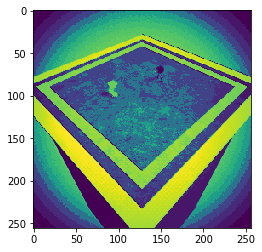

In [67]:
plt.imshow(b)

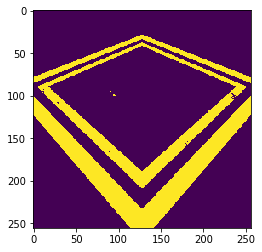

In [69]:
plt.imshow(np.where(b >= 200, 1, 0))

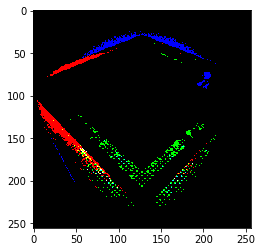

In [86]:
plt.imshow(cv2.threshold(img_list[4], 250, 255, cv2.THRESH_BINARY)[1])

In [ ]:
for e, i in enumerate(img_list):
    cv2.imwrite('agent-'+str(e)+'.png', i)

In [ ]:
for e, i in enumerate(img_list):
    cv2.imwrite('agent-'+str(e)+'.png', i)